# 기본 세팅

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [32]:
plt.rcParams

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [104]:
plt.rcParams['axes.labelsize']=15
plt.rcParams['axes.titlesize']=20

# 데이터 준비 및 자료형 명시적 지정

In [3]:
data = pd.read_csv('./data_merged/data_anal.csv',
                   dtype = {'customer_zip_code_prefix' : str, 'seller_zip_code_prefix' : str,
                           'sequential' : int},
                  parse_dates = ['order_purchase_timestamp', 'order_aproved_at',
                                 'order_estimated_delivery_date', 'order_delivered_customer_date',
                                 'review_creation_date', 'review_answer_timestamp'])

# must have afloat dtype when there are missing values


In [4]:
#for_minsoo = data.loc[data.del_period>50,['del_period','customer_state','customer_city','customer_zip_code_prefix','seller_state','seller_city','seller_zip_code_prefix']].sort_values(by='del_period')
#for_minsoo.to_csv('for_minsoo.csv', index=False)

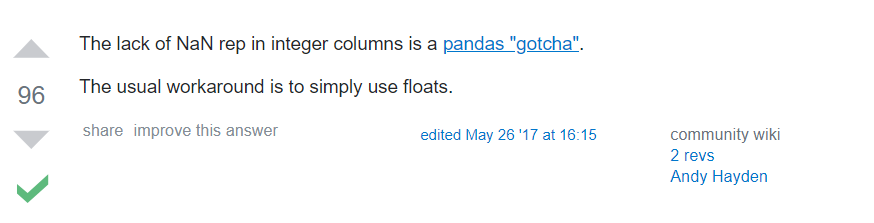

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93000 entries, 0 to 92999
Data columns (total 61 columns):
order_id                          93000 non-null object
order_status                      93000 non-null object
order_products_value              93000 non-null float64
order_freight_value               93000 non-null float64
order_items_qty                   93000 non-null int64
order_sellers_qty                 93000 non-null int64
order_purchase_timestamp          93000 non-null datetime64[ns]
order_aproved_at                  92982 non-null datetime64[ns]
order_estimated_delivery_date     93000 non-null datetime64[ns]
order_delivered_customer_date     90705 non-null datetime64[ns]
product_id                        93000 non-null object
product_category_name_english     93000 non-null object
product_name_lenght               93000 non-null int64
product_description_lenght        93000 non-null int64
product_photos_qty                93000 non-null int64
product_weight_g      

In [6]:
data.isna().sum()

order_id                              0
order_status                          0
order_products_value                  0
order_freight_value                   0
order_items_qty                       0
order_sellers_qty                     0
order_purchase_timestamp              0
order_aproved_at                     18
order_estimated_delivery_date         0
order_delivered_customer_date      2295
product_id                            0
product_category_name_english         0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                     18
product_length_cm                    18
product_height_cm                    18
product_width_cm                     18
customer_unique_id                    0
customer_id                           0
customer_state                        0
customer_city                         0
customer_zip_code_prefix              0
seller_id                            17


In [7]:
'''
from collections import Counter
print(Counter([len(i) for i in data.customer_zip_code_prefix]))
print(Counter([len(str(j)) for j in data.seller_zip_code_prefix]))
data['sequential'].value_counts()
'''

"\nfrom collections import Counter\nprint(Counter([len(i) for i in data.customer_zip_code_prefix]))\nprint(Counter([len(str(j)) for j in data.seller_zip_code_prefix]))\ndata['sequential'].value_counts()\n"

# 기초통계량 숫자로

## 기초 통계 : 숫자로

In [8]:
#data.describe(include='all').to_csv('./stats/describe2.csv', index = True, na_rep = 'NA')
data.describe(include='all')

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_id,customer_state,customer_city,customer_zip_code_prefix,seller_id,seller_state,seller_city,seller_zip_code_prefix,sequential,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,pn_review_score,del_period,del_period_psy,del_period_deadline_yn,payment_voucher_yn,freight_value_proportion,order_time_6,order_day,order_week_day_end,review_ans_time_6,review_ans_day,review_ans_w_d_e,installments_yn,sim_installments_mean,wgt_installments_mean,review_ans_period,review_comment_yn,seller_response_time,cus_lat,cus_lng,sel_lat,sel_lng,order_product_value,review_length,review_comment_title_english,review_comment_message_english
count,93000,93000,93000.000000,93000.000000,93000.000000,93000.000000,93000,92982,93000,90705,93000,93000,93000.00000,93000.000000,93000.000000,92982.000000,92982.000000,92982.000000,92982.000000,93000,93000,93000,93000,93000,92983,92983,92983,92983,93000.000000,93000,93000.000000,7757,38892,93000,93000,93000,90705.000000,90705.000000,93000,93000,93000.000000,93000,93000,93000,93000,93000,93000,93000,93000.000000,91496.000000,93000.000000,93000,92982.000000,93000.000000,93000.000000,92983.000000,92983.000000,93000.000000,38892.00000,7754,38892
unique,93000,7,NaN,NaN,NaN,NaN,92673,92976,476,90703,23175,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90063,93000,27,4087,851,2091,21,475,427,NaN,93000,NaN,3257,32300,666,92532,2,NaN,NaN,2,2,NaN,4,7,2,4,7,2,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2717,31373
top,df6d3b62b959d520809f53e136e27883,delivered,NaN,NaN,NaN,NaN,2017-12-10 22:51:43,2017-12-27 14:03:00,2017-12-20 00:00:00,2016-10-27 17:32:07.811322,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ff4ea78481e00334563aea6d1681f496,8df7e106f99ae17a05a4594b8d77a3cd,sp,sao paulo,130,6560211a19b47992c3666cc44a7e94c0,sp,sao paulo,149,NaN,df6d3b62b959d520809f53e136e27883,NaN,Recomendo,muito bom,2017-12-19 00:00:00,2017-09-08 03:24:52,Positive,NaN,NaN,True,False,NaN,time_3,Tuesday,True,time_1,Friday,True,True,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I recommend,very good
freq,1,90700,NaN,NaN,NaN,NaN,3,3,493,3,612,8980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,38013,14003,1226,2598,66052,21368,6511,NaN,1,NaN,276,535,437,5,71724,NaN,NaN,83691,89323,NaN,35968,15024,71384,31642,16158,68843,48878,NaN,NaN,NaN,54108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567,590
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-05 00:15:33,2016-10-04 09:43:32.358944,2016-10-07 00:00:00,2016-10-11 13:46:32.082168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-09 00:00:00,2016-10-09 21:07:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28 10:54:31,2018-09-28 11:05:22.374345,2018-12-13 00:00:00,2018-10-03 03:46:34.717514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03 00:00:00,2018-10-03 12:54:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,131.939003,21.877264,1.099495,1.026108,NaN,NaN,NaN,NaN,NaN,NaN,48.79371,791.823065,2.297495,2153.282818,30.315986,15.838049,22.950233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047667,NaN,4.092817,NaN,NaN,NaN,NaN,NaN,12.843274,11.375418,NaN,NaN,0.298195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.956526,3.005112,3.342329,NaN,0.423866,-21.154266,-46.143587,-22.842434,-47.320403,123.609105,66.84331,NaN,NaN
std,NaN,NaN,198.420898,20.121699,0.458546,0.229976,NaN,NaN,NaN,NaN,NaN,NaN,10.14620,672.891222,1.751440,3895.273710,16

In [9]:
data.order_time_6.value_counts()

time_3    35968
time_4    32189
time_2    20404
time_1     4439
Name: order_time_6, dtype: int64

In [10]:
data.review_score.value_counts()

5    53535
4    18189
1    10321
3     7970
2     2985
Name: review_score, dtype: int64

# 기초통계 시각화(Frequency Distribution)

## order_status 시각화

In [11]:
from collections import Counter
os_count = Counter(data.order_status)
print(os_count)

Counter({'delivered': 90700, 'shipped': 1138, 'canceled': 475, 'processing': 372, 'invoiced': 304, 'unavailable': 9, 'approved': 2})


delivered      90700
shipped         1138
canceled         475
processing       372
invoiced         304
unavailable        9
approved           2
Name: order_status, dtype: int64

Index(['delivered', 'shipped', 'canceled', 'processing', 'invoiced',
       'unavailable', 'approved'],
      dtype='object')


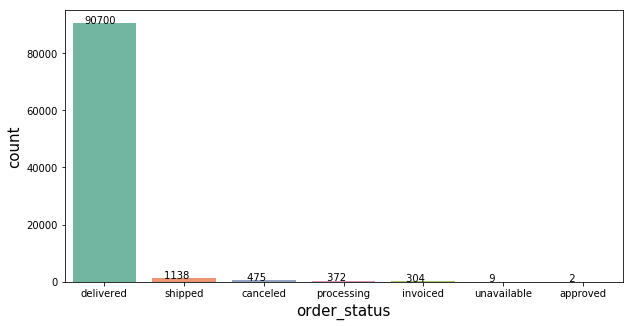

In [48]:
print(data['order_status'].value_counts());print()
print(data['order_status'].value_counts().index)

plt.figure(figsize=(10,5))
ax = sns.countplot(data.order_status, palette="Set2", order=data['order_status'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.15, height+ 3, f'{height:^5d}')

In [13]:
#plt.bar(x = os_count.keys(), height = os_count.values())

## order_purchase_timestamp 월별 빈도수 분포

* 고객의 첫주문은 2016년 9월, 마지막 주문은 2018년 9월
* 모든 데이터에 대해 주문 월 빈도수 빈포를 보면 분포의 비율이 왜곡될 수 있다고 판단
* 2017년의 데이터만으로 월변 빈도수 분포를 살펴보았음
* 하지만, olist가 스타트업이라는 점을 고려하면 월별 빈도수 분포를 모든년도에 일반화하기도 어려움
* 따라서, 2016년 9월 -> 2018년 9월로 진행하면서의 주문건수도 살펴보아야 함
* 살펴본 결과, 월별로 주문건수에 대한 패턴이 안보여 월별 빈도수 빈포를 사용하기는 어려울 것 같음
* 월에 따른 리뷰평점은 볼만할 것 같음

In [14]:
# Timestamp클래스에서 필요한 정보 추출하기

print(data.order_purchase_timestamp[0:10]);print()
print(type(data.order_purchase_timestamp[0]));print()
print(data.order_purchase_timestamp.dt);print()

opt = data.order_purchase_timestamp.dt
opt_prop = pd.DataFrame({'year':opt.year,
             'month':opt.month,
             'day':opt.day,
             'hour':opt.hour,
             'minute':opt.minute,
              #'week':opt.week,
              'weekofyear':opt.weekofyear,
             'dayofyear':opt.dayofyear,
              'weekday':opt.weekday,
              'quarter':opt.quarter
             })
opt_prop

0   2017-01-31 17:19:01
1   2018-02-18 12:41:01
2   2018-05-09 23:33:28
3   2017-10-26 09:07:04
4   2018-08-11 15:41:42
5   2017-10-18 20:26:10
6   2017-03-04 14:15:02
7   2018-07-15 22:07:27
8   2018-02-09 13:46:39
9   2018-09-17 21:30:19
Name: order_purchase_timestamp, dtype: datetime64[ns]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>




,year,month,day,hour,minute,weekofyear,dayofyear,weekday,quarter
0,2017,1,31,17,19,5,31,1,1
1,2018,2,18,12,41,7,49,6,1
2,2018,5,9,23,33,19,129,2,2
3,2017,10,26,9,7,43,299,3,4
4,2018,8,11,15,41,32,223,5,3
5,2017,10,18,20,26,42,291,2,4
6,2017,3,4,14,15,9,63,5,1
7,2018,7,15,22,7,28,196,6,3
8,2018,2,9,13,46,6,40,4,1
9,2018,9,17,21,30,38,260,0,3


### 2017년 데이터 월별 빈도수 빈포

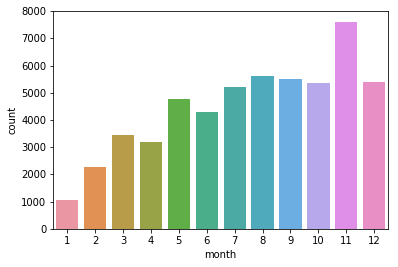

In [15]:
sns.countplot(x = 'month',
              data = opt_prop.loc[opt_prop.year==2017,:])

### 전체데이터셋 월별 빈도수 빈포

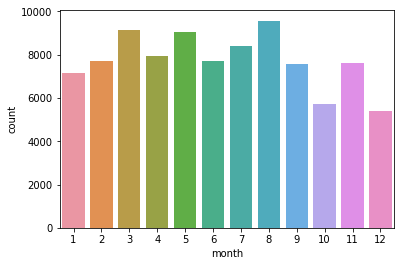

In [16]:
sns.countplot(x = 'month',
              data = opt_prop)

### 전체데이터셋 연도+월 빈도수 분포

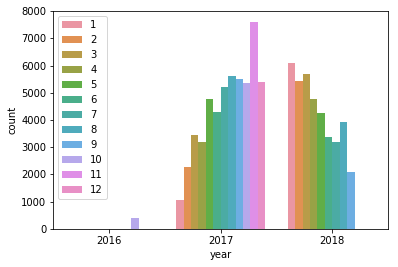

In [17]:
sns.countplot(x = 'year', hue = 'month',
              data = opt_prop)
plt.legend(loc=2) # legend를 그래프 좌상단에 위치시킴

## order_estimated_delivery_date 시각화

In [18]:
# Timestamp클래스에서 필요한 정보 추출하기
print(data.order_estimated_delivery_date.dt);print()

oedd = data.order_estimated_delivery_date.dt
oedd_prop = pd.DataFrame({'year':oedd.year,
             'month':oedd.month,
             'day':oedd.day,
             'hour':oedd.hour,
             'minute':oedd.minute,
              #'week':opt.week,
              'weekofyear':oedd.weekofyear,
             'dayofyear':oedd.dayofyear,
              'weekday':oedd.weekday,
              'quarter':oedd.quarter
             })
oedd_prop

,year,month,day,hour,minute,weekofyear,dayofyear,weekday,quarter
0,2017,3,15,0,0,11,74,2,1
1,2018,3,14,0,0,11,73,2,1
2,2018,5,24,0,0,21,144,3,2
3,2017,11,9,0,0,45,313,3,4
4,2018,8,28,0,0,35,240,1,3
5,2017,11,3,0,0,44,307,4,4
6,2017,3,27,0,0,13,86,0,1
7,2018,7,31,0,0,31,212,1,3
8,2018,2,23,0,0,8,54,4,1
9,2018,9,28,0,0,39,271,4,3


### 전체데이터셋 월별 빈도수 분포

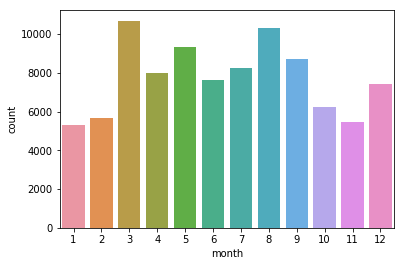

In [19]:
sns.countplot(x='month', data=oedd_prop)

### 2017년 월별 빈도수 분포

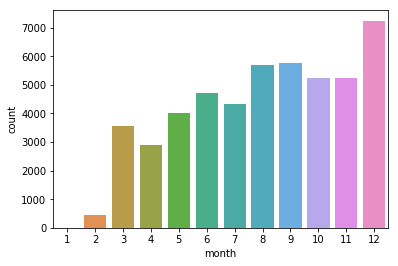

In [20]:
sns.countplot(x='month', data=oedd_prop.loc[oedd_prop.year==2017,:])

### 전체데이터셋 연도+월 빈도수 분포

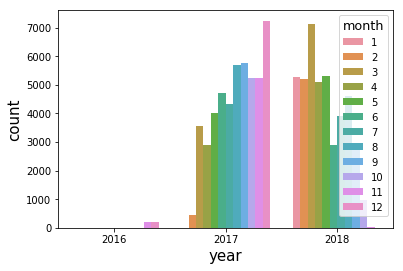

In [49]:
sns.countplot(x='year', hue='month', data=oedd_prop)

## product_category_name_english 시각화

[[]]

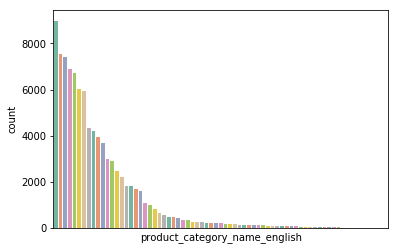

In [22]:
ax = sns.countplot(data.product_category_name_english,
              palette="Set2",
              order=data['product_category_name_english'].value_counts().index)
ax.set(xticks=[])

In [23]:
data['product_category_name_english'].value_counts()

bed_bath_table                             8980
health_beauty                              7556
sports_leisure                             7404
furniture_decor                            6869
watches_gifts                              6699
computers_accessories                      6026
housewares                                 5922
garden_tools                               4314
cool_stuff                                 4197
toys                                       3926
perfumery                                  3662
telephony                                  2967
auto                                       2914
fashion_bags_accessories                   2458
baby                                       2215
stationery                                 1807
pet_shop                                   1799
electronics                                1665
office_furniture                           1588
consoles_games                             1069
luggage_accessories                     

## customer_state 시각화

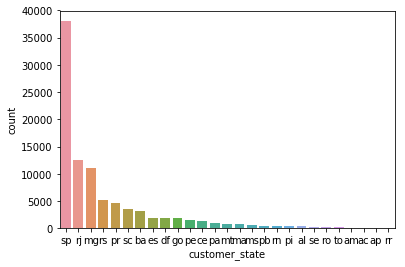

In [24]:
sns.countplot(data.customer_state, order=data.customer_state.value_counts().index)

In [25]:
data.customer_state.value_counts()

sp    38013
rj    12541
mg    11138
rs     5201
pr     4715
sc     3510
ba     3251
es     1904
df     1886
go     1862
pe     1538
ce     1267
pa      963
mt      843
ma      717
ms      654
pb      518
rn      486
pi      432
al      403
se      326
ro      256
to      251
am      133
ac       84
ap       64
rr       44
Name: customer_state, dtype: int64

## customer_city 시각화

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

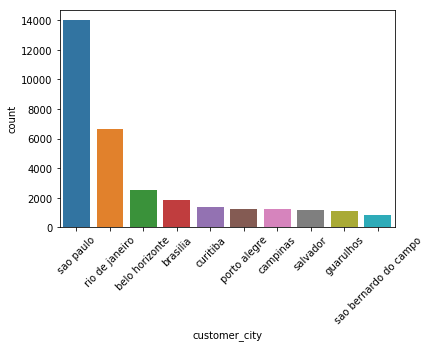

In [26]:
sns.countplot(data.customer_city,
              order=data.customer_city.value_counts()[:10].index)
plt.xticks(rotation=45)

In [27]:
data.customer_city.value_counts()

sao paulo                        14003
rio de janeiro                    6666
belo horizonte                    2513
brasilia                          1877
curitiba                          1384
porto alegre                      1262
campinas                          1261
salvador                          1141
guarulhos                         1109
sao bernardo do campo              856
niteroi                            781
santo andre                        735
osasco                             712
santos                             655
goiania                            612
sao jose dos campos                610
sorocaba                           587
fortaleza                          567
recife                             566
florianopolis                      544
jundiai                            517
ribeirao preto                     478
juiz de fora                       452
nova iguacu                        447
sao goncalo                        426
belem                    

## customer_zip_code_prefix 시각화

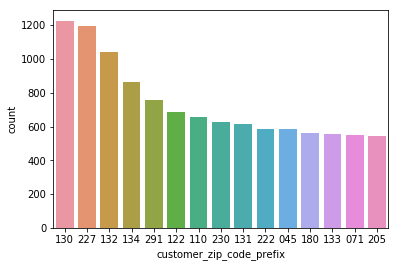

In [28]:
sns.countplot(data.customer_zip_code_prefix,
              order = data.customer_zip_code_prefix.value_counts()[:15].index)

## seller_state 시각화

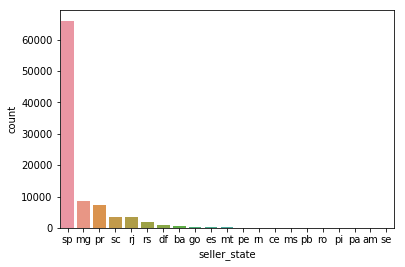

In [29]:
sns.countplot(data.seller_state, order = data.seller_state.value_counts().index)

## seller_city 시각화

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

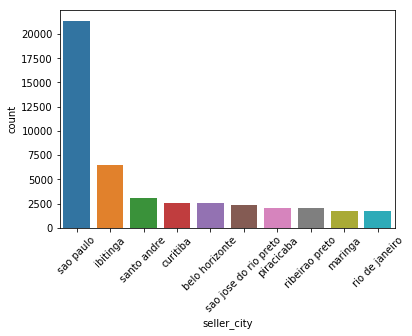

In [30]:
sns.countplot(data.seller_city, order=data.seller_city.value_counts()[:10].index)
plt.xticks(rotation=45)

## seller_zip_code_prefix 시각화

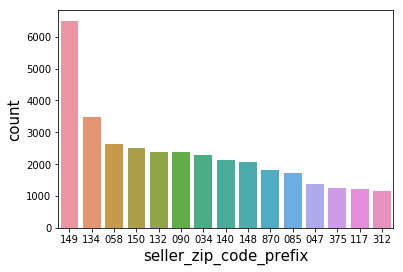

In [47]:
sns.countplot(data.seller_zip_code_prefix,
              order=data.seller_zip_code_prefix.value_counts()[:15].index)

## review_score Frequency Distribution

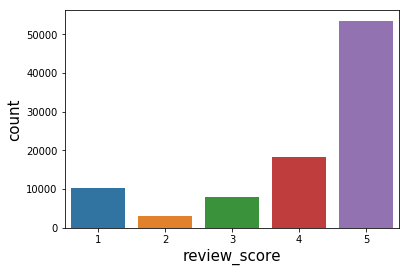

In [50]:
ax = sns.countplot(data.review_score)

#ax.xaxis.label.set_fontsize(20)

## pn_review_score 시각화

In [51]:
data.pn_review_score.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: pn_review_score, dtype: object

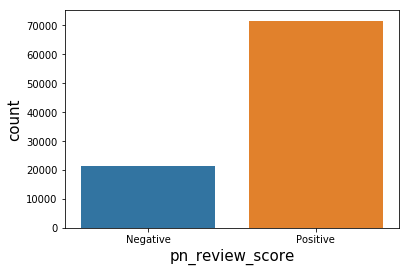

In [54]:
sns.countplot(x='pn_review_score', data=data, order=['Negative','Positive'])

## del_period_deadline_yn 시각화

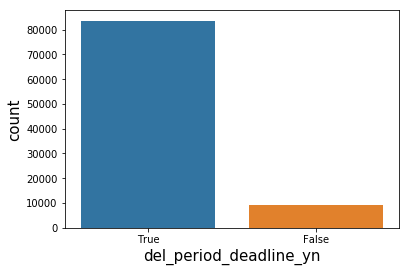

In [83]:
sns.countplot(data.del_period_deadline_yn, order=[True,False])

## payment_voucher_yn 시각화

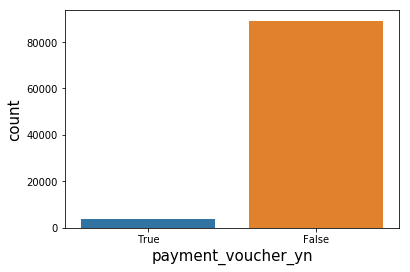

In [82]:
sns.countplot(data.payment_voucher_yn, order=[True,False])

## order_time_6 시각화

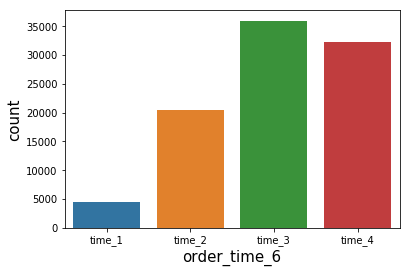

In [60]:
sns.countplot(data.order_time_6, order=['time_1', 'time_2', 'time_3', 'time_4'])

## order_day 시각화

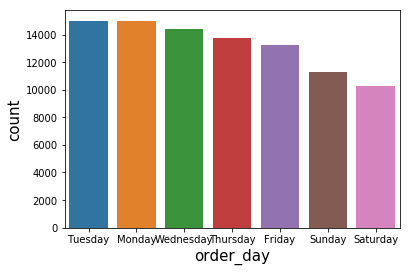

In [65]:
sns.countplot(data.order_day, order=data.order_day.value_counts().index)

## order_week_day_end 시각화

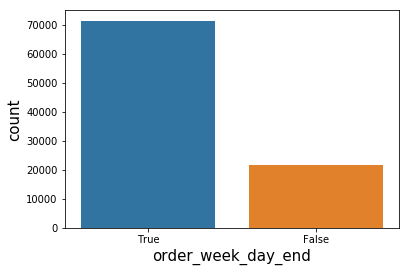

In [69]:
sns.countplot(data.order_week_day_end, order=[True,False])

## review_ans_time_6 시각화

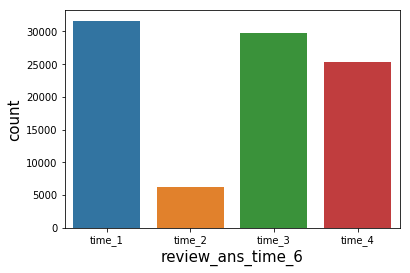

In [71]:
sns.countplot(data.review_ans_time_6, order=['time_1','time_2','time_3','time_4'])

## review_ans_day 시각화

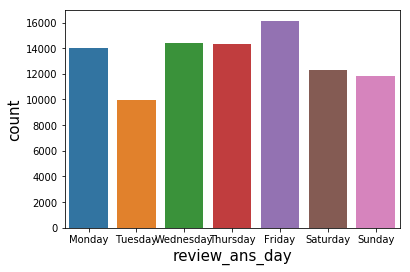

In [75]:
sns.countplot(data.review_ans_day,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

## review_ans_w_d_e 시각화

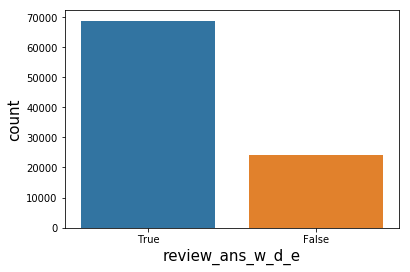

In [77]:
sns.countplot(data.review_ans_w_d_e, order=[True,False])

## installments_yn 시각화

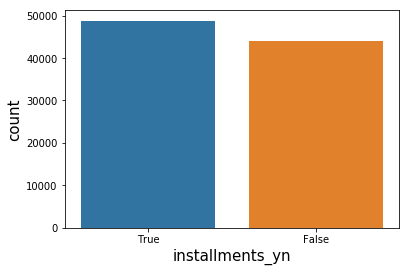

In [79]:
sns.countplot(data.installments_yn, order=[True,False])

## review_comment_yn 시각화

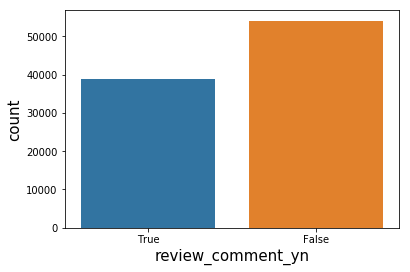

In [81]:
sns.countplot(data.review_comment_yn, order=[True,False])

## 기타들

### 요일별 빈도수

In [5]:
data['order_purchase_weekday'] = data.order_purchase_timestamp.apply(pd.Timestamp.day_name)

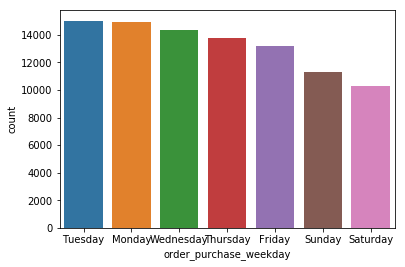

In [6]:
sns.countplot(x = 'order_purchase_weekday', data = data, order = data.order_purchase_weekday.value_counts().index)

### 평일/주말별 빈도수

In [7]:
weekday_mapping = {
    'Monday' : 'Weekdays',
    'Tuesday' : 'Weekdays',
    'Wednesday' : 'Weekdays',
    'Thursday' : 'Weekdays',
    'Friday' : 'Weekdays',
    'Saturday' : 'Weekends',
    'Sunday' : 'Weekends'
}

data['order_week_day_end'] = data.order_purchase_weekday.map(lambda x : weekday_mapping.get(x, x))

In [8]:
data.order_week_day_end.value_counts

<bound method IndexOpsMixin.value_counts of 0        Weekdays
1        Weekends
2        Weekdays
3        Weekdays
4        Weekends
5        Weekdays
6        Weekends
7        Weekends
8        Weekdays
9        Weekdays
10       Weekends
11       Weekdays
12       Weekdays
13       Weekdays
14       Weekends
15       Weekdays
16       Weekdays
17       Weekdays
18       Weekdays
19       Weekdays
20       Weekdays
21       Weekends
22       Weekdays
23       Weekdays
24       Weekends
25       Weekdays
26       Weekdays
27       Weekdays
28       Weekdays
29       Weekends
30       Weekdays
31       Weekends
32       Weekends
33       Weekdays
34       Weekdays
35       Weekdays
36       Weekdays
37       Weekdays
38       Weekdays
39       Weekdays
40       Weekdays
41       Weekdays
42       Weekends
43       Weekdays
44       Weekdays
45       Weekdays
46       Weekdays
47       Weekdays
48       Weekends
49       Weekdays
           ...   
92950    Weekdays
92951    Weekdays
92

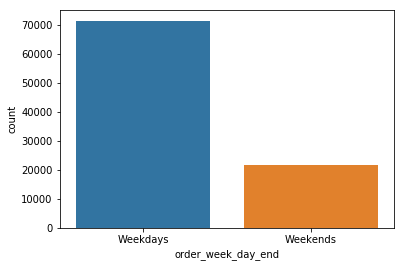

In [9]:
sns.countplot(x = 'order_week_day_end', data = data, order = ['Weekdays', 'Weekends'])

### 시간에 따른 빈도수

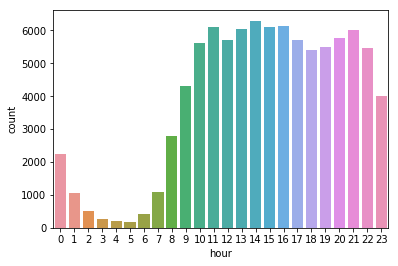

In [10]:
sns.countplot(x = 'hour', data = opt_prop)

### 시간대에 따른 빈도수

([<matplotlib.axis.XTick at 0x16709391ba8>,
 <a list of 8 Text xticklabel objects>)

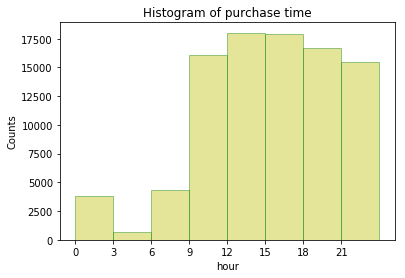

In [50]:
#sns.set_color_codes()
sns.distplot(opt_prop.hour, bins=[0, 3, 6, 9, 12, 15, 18, 21, 24],
             hist_kws = {'edgecolor' : 'green'},
             kde=False, rug=False, color = 'y')
plt.title('Histogram of purchase time')
plt.ylabel('Counts')
plt.xticks([0,3,6,9,12,15,18,21])

### 요일 x  시간에 따른 빈도수

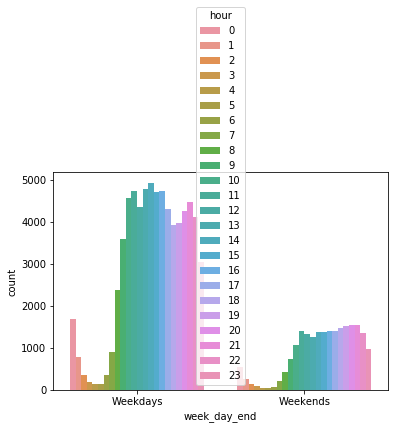

In [81]:
sns.countplot(x="week_day_end", hue="hour", data=opt_prop)

In [61]:
data.columns[100:len(data.columns)]

Index(['value_14', 'value_15', 'value_16', 'value_17', 'value_18', 'value_19',
       'value_20', 'value_21', 'value_22', 'value_23', 'value_24', 'value_25',
       'value_26', 'value_27', 'value_28', 'value_29', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'order_purchase_weekday', 'order_week_day_end', 'faster_than_est'],
      dtype='object')

In [15]:
opt_prop

,year,month,day,hour,minute,week,weekofyear,dayofyear,weekday,quarter
0,2017,1,31,17,19,5,5,31,1,1
1,2018,2,18,12,41,7,7,49,6,1
2,2018,5,9,23,33,19,19,129,2,2
3,2017,10,26,9,7,43,43,299,3,4
4,2018,8,11,15,41,32,32,223,5,3
5,2017,10,18,20,26,42,42,291,2,4
6,2017,3,4,14,15,9,9,63,5,1
7,2018,7,15,22,7,28,28,196,6,3
8,2018,2,9,13,46,6,6,40,4,1
9,2018,9,17,21,30,38,38,260,0,3


In [10]:
hist, edges = np.histogram(opt_prop.hour,
                         bins = 8,
                         range = (0,24),
                         density=False)
print(hist)
print(edges)
print(len(edges))


[ 3951   647  4417 16581 18676 18650 17279 16034]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24.]
9


In [81]:
print(opt_df.hour.value_counts())
print(2317 + 1092 + 542)

14    6531
16    6376
15    6357
11    6334
13    6271
21    6219
20    5967
17    5917
12    5874
10    5830
19    5699
22    5656
18    5613
9     4417
23    4159
8     2841
0     2317
7     1131
1     1092
2      542
6      445
3      269
4      193
5      185
Name: hour, dtype: int64
3951


# 기초통계 시각화(기술통계)

In [ ]:
'''
# numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    # Returns
        # hist : array
            -The values of the histogram. See density and weights for a description of the possible semantics
        # bin_edges : array of dtype float
            -Return the bin edges
'''

## order_products_value

fig, ax = plt.subplots()
data.order_products_value.plot.kde(ax=ax)
data.order_products_value.plot.hist(ax=ax)
plt.xlabel('order_products_value')
plt.ylabel('Frequency')
plt.title('Histogram : order_products_value')

plt.hist(data.order_products_value)


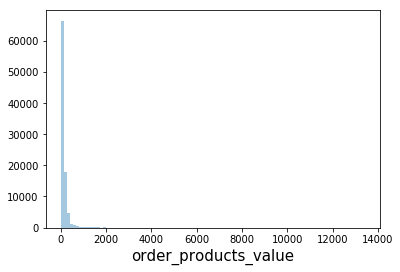

In [142]:
sns.distplot(data.order_products_value,
             bins = 100,
             #hist_kws = {'range':(0,1000)},
             kde = False)

## order_freight_value

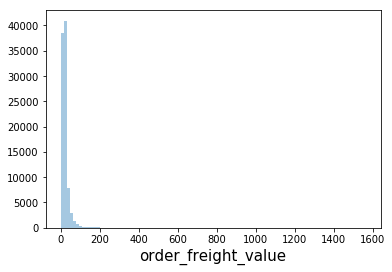

In [143]:
sns.distplot(data.order_freight_value,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## order_items_qty

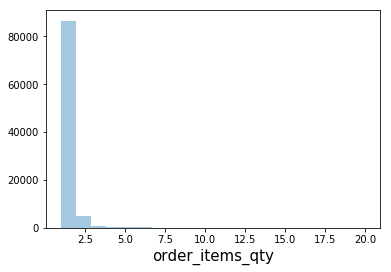

In [144]:
sns.distplot(data.order_items_qty,
             bins = 20,
             #hist_kws = {'range':(0,10)},
             kde = False)

## order_sellers_qty

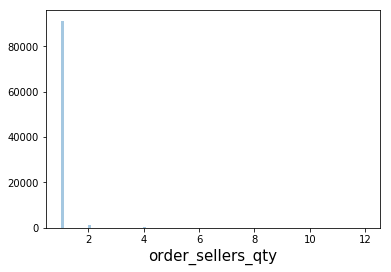

In [141]:
sns.distplot(data.order_sellers_qty,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_name_lenght

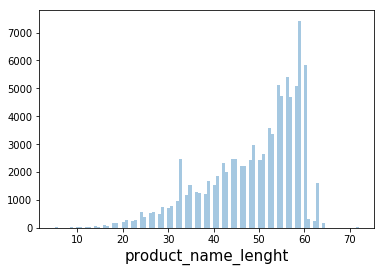

In [165]:
sns.distplot(data.product_name_lenght,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_description_lenght

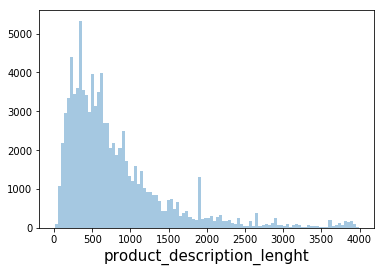

In [164]:
sns.distplot(data.product_description_lenght,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_photos_qty

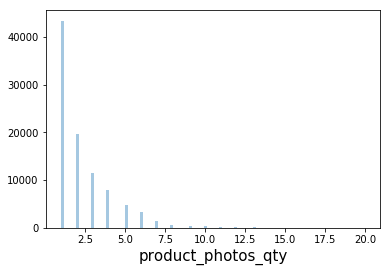

In [163]:
sns.distplot(data.product_photos_qty,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_weight_g

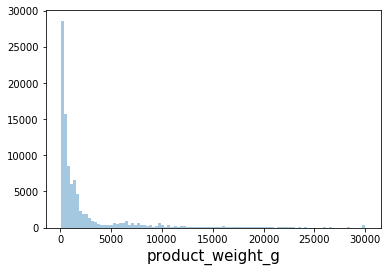

In [162]:
sns.distplot(data.product_weight_g,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_length_cm

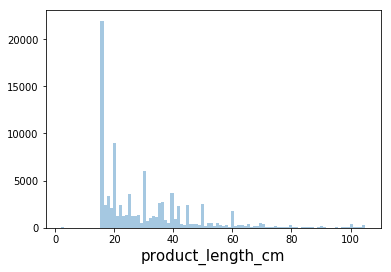

In [160]:
sns.distplot(data.product_length_cm,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_height_cm

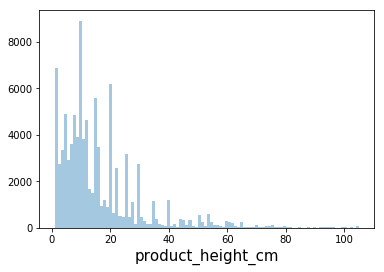

In [159]:
sns.distplot(data.product_height_cm,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## product_width_cm

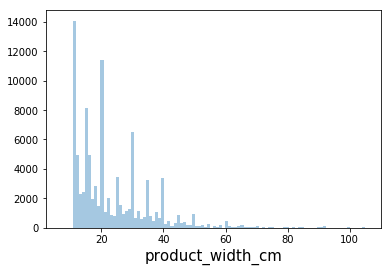

In [158]:
sns.distplot(data.product_width_cm,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## sequential

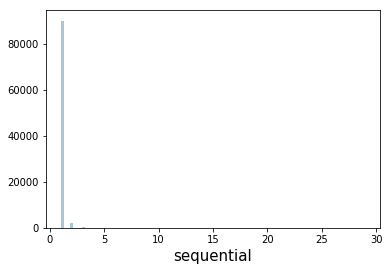

In [157]:
sns.distplot(data.sequential,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## del_period

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


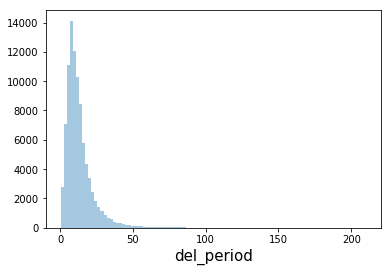

In [146]:
sns.distplot(data.del_period,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## del_period_psy

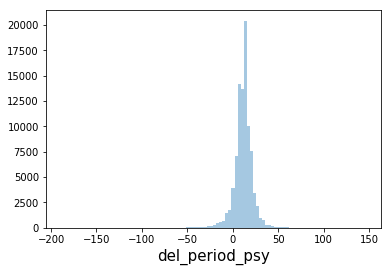

In [147]:
sns.distplot(data.del_period_psy,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## freight_value_proportion

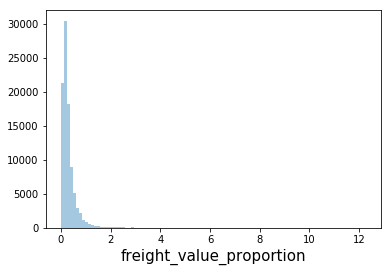

In [150]:
sns.distplot(data.freight_value_proportion,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## sim_installments_mean

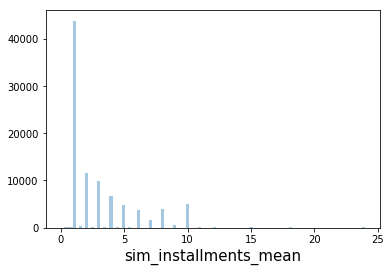

In [151]:
sns.distplot(data.sim_installments_mean,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## wgt_installments_mean

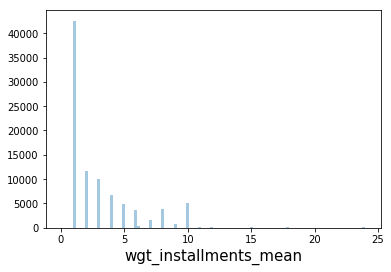

In [152]:
sns.distplot(data.wgt_installments_mean,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## review_ans_period

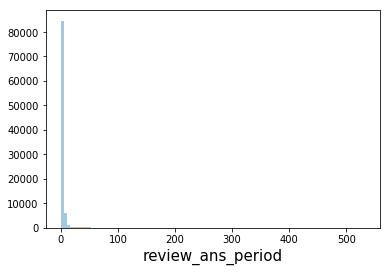

In [153]:
sns.distplot(data.review_ans_period,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## seller_response_time

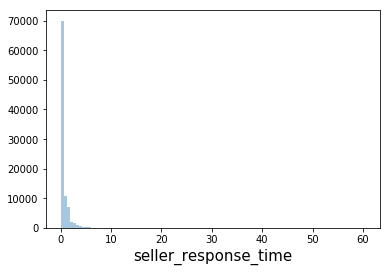

In [154]:
sns.distplot(data.seller_response_time,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## order_product_value

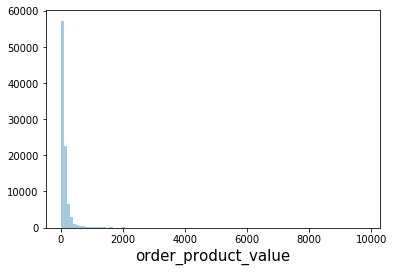

In [155]:
sns.distplot(data.order_product_value,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

## review_length

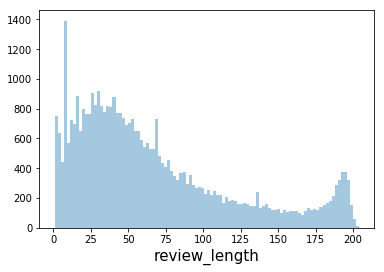

In [156]:
sns.distplot(data.review_length,
             bins = 100,
             #hist_kws = {'range':(0,300)},
             kde = False)

# order_products_value, order_freight_value 이해

In [58]:
data2[data2.duplicated('order_id', keep=False)].sort_values('order_id')

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_id,customer_city,customer_state,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,installments_1,installments_2,installments_3,installments_4,installments_5,installments_6,installments_7,installments_8,installments_9,installments_10,installments_11,installments_12,installments_13,installments_14,installments_15,installments_16,installments_17,installments_18,installments_19,installments_20,installments_21,installments_22,installments_23,installments_24,installments_25,installments_26,installments_27,installments_28,installments_29,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,payment_type_6,payment_type_7,payment_type_8,payment_type_9,payment_type_10,payment_type_11,payment_type_12,payment_type_13,payment_type_14,payment_type_15,payment_type_16,payment_type_17,payment_type_18,payment_type_19,payment_type_20,payment_type_21,payment_type_22,payment_type_23,payment_type_24,payment_type_25,payment_type_26,payment_type_27,payment_type_28,payment_type_29,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28,value_29,sequential
46890,000330af600103828257923c9aa98ae2,delivered,42.00,16.36,1,4,2017-11-13 22:59:54,2017-11-13 23:10:40.663223,2017-12-13,2017-12-09 16:42:14.232409,fad0bbc7d520cbb3c5b67d4d4b546826,Barra de Sao Joao,RJ,288,56,595,1,8dacd980e54f23aaaa6bb4f33478664e,000330af600103828257923c9aa98ae2,4,NaN,NaN,2017-12-10,2017-12-15 02:58:44,housewares,225bffd033b6dae803fc04f6e83751fc,1600.0,30.0,30.0,30.0,53e4c6e0f4312d4d2107a8c9cddf45cd,139,pedreira,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62595,000330af600103828257923c9aa98ae2,delivered,17.49,17.34,1,4,2017-11-13 22:59:54,2017-11-13 23:10:40.663223,2017-12-13,2017-12-09 16:42:14.232409,fad0bbc7d520cbb3c5b67d4d4b546826,Barra de Sao Joao,RJ,288,42,2263,6,0776155007ad20447a0b0f91d4aad644,000330af600103828257923c9aa98ae2,4,NaN,NaN,2017-12-10,2017-12-15 02:58:44,food_drink,225bffd033b6dae803fc04f6e83751fc,1000.0,28.0,13.0,13.0,e9779976487b77c6d4ac45f75ec7afe9,117,praia grande,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68526,005d9a5423d47281ac463a968b3936fb,delivered,49.99,18.12,1,2,2017-10-18 12:14:29,2017-10-18 12:28:16.949229,2017-11-17,2017-10-27 19:19:43.379349,a2be07c22a9d2071f65b6770e47f540b,Sao Jose do Rio Pardo,SP,137,58,321,2,fb7a100ec8c7b34f60cec22b1a9a10e0,005d9a5423d47281ac463a968b3936fb,1,NaN,ainda não recebi todos os produtos,2017-10-28,2017-10-31 00:58:31,toys,1edfbbb6a625a3b4853d9c7e7ea63659,150.0,16.0,16.0,16.0,d98eec89afa3380e14463da2aabaea72,900,porto alegre,RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# 공부

### matplotlib.pyplot.hist

([<matplotlib.axis.XTick at 0x16705644cf8>,
 <a list of 9 Text xticklabel objects>)

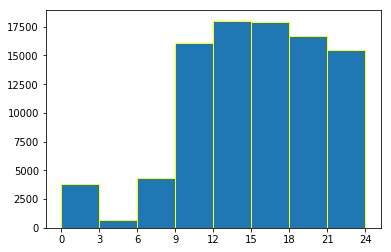

In [19]:
n, bins, patches = plt.hist(opt.hour, bins = [0, 3, 6, 9, 12, 15, 18, 21, 24], edgecolor = 'yellow')
plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

In [21]:
print(n)
print(bins)
print(patches)

[ 3802.   637.  4334. 16070. 18027. 17941. 16680. 15509.]
[ 0  3  6  9 12 15 18 21 24]
<a list of 8 Patch objects>


In [23]:
patches[0]

In [28]:
import matplotlib as mpl
plt.Rectangle((1, 1), 1, 1)

### matplotlib.patches

In [ ]:
def plot_region(self, region):
    '''Shows the given region in the field plot
    
    Args :
        region : Region to be plotted.
    '''
    if type(region) == reg.PointRegion:
        self.axes.scatter(region.point_coordinate)

### stacked bar

In [29]:
data.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_id,customer_state,customer_city,customer_zip_code_prefix,seller_id,seller_state,seller_city,seller_zip_code_prefix,sequential,installments_1,installments_2,installments_3,installments_4,installments_5,installments_6,installments_7,installments_8,installments_9,installments_10,installments_11,installments_12,installments_13,installments_14,installments_15,installments_16,installments_17,installments_18,installments_19,installments_20,installments_21,installments_22,installments_23,installments_24,installments_25,installments_26,installments_27,installments_28,installments_29,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,payment_type_6,payment_type_7,payment_type_8,payment_type_9,payment_type_10,payment_type_11,payment_type_12,payment_type_13,payment_type_14,payment_type_15,payment_type_16,payment_type_17,payment_type_18,payment_type_19,payment_type_20,payment_type_21,payment_type_22,payment_type_23,payment_type_24,payment_type_25,payment_type_26,payment_type_27,payment_type_28,payment_type_29,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28,value_29,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_weekday,order_week_day_end
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,6cdd53843498f92890544667809f1595,health_beauty,51,625,1,900.0,25.0,12.0,38.0,a27e24da3a7dc34713304a30896a3c4e,297dcf281305aabfee256d313076af2b,PR,Guaratuba,832,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,curitiba,803,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,boleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07,2017-02-09 02:37:37,Tuesday,Weekdays
1,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14,2018-03-03 02:48:53.603256,5858f45c20fde7d7e49af37a2166635a,health_beauty,38,1665,1,2300.0,17.0,9.0,32.0,04533db2963aa82a202f214aeff155a6,f19376e0c54da9409485f7ef9556d367,MG,Belo Horizonte,308,b56906f7fd1696e043f1bcce164c487b,SP,echapora,198,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04,2018-03-07 02:53:50,Sunday,Weekends
2,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24,2018-05-17 22:31:58.137648,2b4609f8948be18874494203496bc318,health_beauty,59,492,3,250.0,22.0,10.0,18.0,0e37bd1acb9088c21332942d2a334cf7,12698ad9da6b62003811594de0ae297e,ES,Cachoeiro de Itapemirim,293,cc419e0650a3c5ba77189a1882b7556a,SP,santo andre,090,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,boleto,NaN,NaN,NaN,NaN,

In [35]:
data['faster_than_est'] = data.order_delivered_customer_date < data.order_estimated_delivery_date
data['faster_than_est']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20       False
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49       False
         ...  
92950     True
92951     True
92952     True
92953     True
92954     True
92955     True
92956     True
92957     True
92958     True
92959     True
92960    False
92961     True
92962    False
92963     True
92964     True
92965     

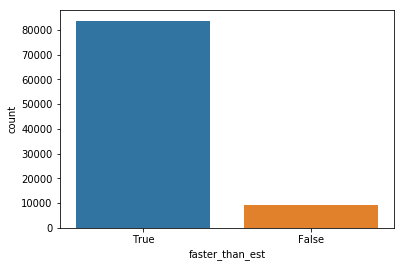

In [38]:
sns.countplot(x = 'faster_than_est', data = data, order = [True, False])

In [42]:
data.review_score[data.faster_than_est == True].mean()
data.review_score[data.faster_than_est == False].mean()

2.3433236652701686

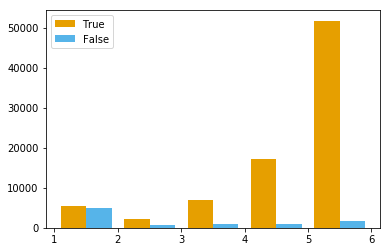

In [48]:
x1 = data.review_score[data.faster_than_est == True]
x2 = data.review_score[data.faster_than_est == False]

colors = ['#E69F00', '#56B4E9']
names = ['True', 'False']

plt.hist([x1, x2], bins= [1,2,3,4,5,6], color = colors, label = names)

plt.legend()
plt.xlabel('review score')
plt.ylabel('counts')
plt.title('Side-by-Side Histogram with Multiple Classes')

In [49]:
sns.countplot(x=[x1, x2])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

# payments

In [6]:
data.shape

(93000, 122)

In [11]:
data.order_id.nunique()

93000

In [17]:
data.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_id,customer_state,customer_city,customer_zip_code_prefix,seller_id,seller_state,seller_city,seller_zip_code_prefix,sequential,installments_1,installments_2,installments_3,installments_4,installments_5,installments_6,installments_7,installments_8,installments_9,installments_10,installments_11,installments_12,installments_13,installments_14,installments_15,installments_16,installments_17,installments_18,installments_19,installments_20,installments_21,installments_22,installments_23,installments_24,installments_25,installments_26,installments_27,installments_28,installments_29,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,payment_type_6,payment_type_7,payment_type_8,payment_type_9,payment_type_10,payment_type_11,payment_type_12,payment_type_13,payment_type_14,payment_type_15,payment_type_16,payment_type_17,payment_type_18,payment_type_19,payment_type_20,payment_type_21,payment_type_22,payment_type_23,payment_type_24,payment_type_25,payment_type_26,payment_type_27,payment_type_28,payment_type_29,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28,value_29,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15,2017-02-06 11:04:24.154259,6cdd53843498f92890544667809f1595,health_beauty,51,625,1,900.0,25.0,12.0,38.0,a27e24da3a7dc34713304a30896a3c4e,297dcf281305aabfee256d313076af2b,PR,Guaratuba,832,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,curitiba,803,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,boleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07,2017-02-09 02:37:37
1,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18 13:46:36.606696,2018-03-14,2018-03-03 02:48:53.603256,5858f45c20fde7d7e49af37a2166635a,health_beauty,38,1665,1,2300.0,17.0,9.0,32.0,04533db2963aa82a202f214aeff155a6,f19376e0c54da9409485f7ef9556d367,MG,Belo Horizonte,308,b56906f7fd1696e043f1bcce164c487b,SP,echapora,198,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04,2018-03-07 02:53:50
2,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11 02:57:52.916830,2018-05-24,2018-05-17 22:31:58.137648,2b4609f8948be18874494203496bc318,health_beauty,59,492,3,250.0,22.0,10.0,18.0,0e37bd1acb9088c21332942d2a334cf7,12698ad9da6b62003811594de0ae297e,ES,Cachoeiro de Itapemirim,293,cc419e0650a3c5ba77189a1882b7556a,SP,santo andre,090,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,boleto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
data.sequential.value_counts()

1     90132
2      2285
3       289
4       117
5        59
6        35
7        24
9        10
8         9
11        9
10        7
12        7
13        4
14        3
15        2
19        2
26        2
27        1
17        1
21        1
29        1
Name: sequential, dtype: int64